In [4]:
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
def percentile(arr, p):
    """Returns the pth percentile of the input array (the value that is at
    least as great as p% of the values in the array).

    If arr is not provided, percentile returns itself curried with p

    >>> percentile([1, 3, 5, 9], 74.9)
    5
    >>> percentile([1, 3, 5, 9], 75)
    5
    >>> percentile([1, 3, 5, 9], 75.1)
    9

    """
    if p == 0:
        return min(arr)
    assert 0 < p <= 100, 'Percentile requires a percent'
    i = (p/100) * len(arr)
    return sorted(arr)[math.ceil(i) - 1]



## Confidence Interval for a Population Median: Bootstrap  Percentile Method

We will now use the bootstrap method to estimate an unknown population median. The data come from a sample of newborns in a large hospital system; we will treat it as if it were a simple random sample.

The table baby contains the following variables for mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [6]:
births = pd.read_csv('baby.csv')
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [7]:
babies = births[['Birth Weight', 'Gestational Days']]
babies

,Birth Weight,Gestational Days
0,120,284
1,113,282
2,128,279
3,108,282
4,136,286
...,...,...
1169,113,275
1170,128,265
1171,130,291
1172,125,281


Birth weight is an important factor in the health of a newborn infant – smaller babies tend to need more medical care in their first days than larger newborns. It is therefore helpful to have an estimate of birth weight before the baby is born. One way to do this is to examine the relationship between birth weight and the number of gestational days.

A simple measure of this relationship is the ratio of birth weight to the number of gestational days (Weight per Day). The updated table  contains the first two columns of baby, as well as a column of the ratios (Weight per Day).

In [6]:
babies['Weight per Day']=babies['Birth Weight'] / babies['Gestational Days']
babies

/var/folders/xm/0fnw587x3kl7d1bprrnqhygh0000gn/T/ipykernel_61680/302353416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babies['Weight per Day']=babies['Birth Weight'] / babies['Gestational Days']


,Birth Weight,Gestational Days,Weight per Day
0,120,284,0.422535
1,113,282,0.400709
2,128,279,0.458781
3,108,282,0.382979
4,136,286,0.475524
...,...,...,...
1169,113,275,0.410909
1170,128,265,0.483019
1171,130,291,0.446735
1172,125,281,0.444840


Here is a histogram of the ratios:

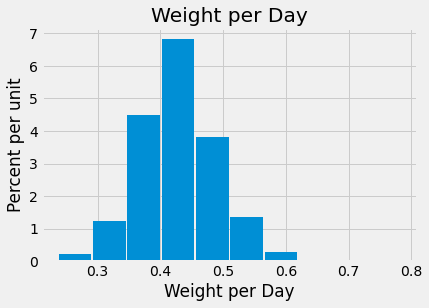

In [7]:
babies.hist('Weight per Day', density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Weight per Day')
plt.show()

The median ratio in the sample:

In [8]:
percentile(babies['Weight per Day'],50)

0.42907801418439717

But what was the median in the population? We don’t know, so we will estimate an interval for it.

We will bootstrap the sample 1,000 times resulting in 1,000 estimates of the median. Our 95% confidence interval will be the “middle 95%” of all of our estimates.

In [9]:
# Bootstrap for median

medians = np.array([])

for i in np.arange(1000):
    resampled = babies.sample(len(babies), replace=True)
    median = percentile(resampled['Weight per Day'], 50)
    medians = np.append(medians, median)

In [10]:
len(medians)

1000

95% confidence interval:

In [11]:
interval_95 = np.array([percentile(medians,2.5), percentile(medians,97.5)])
interval_95

array([0.42532468, 0.43272727])

We just have an interval of estimates. It is a 95% confidence interval of estimates, because the process that generates it produces a good interval about 95% of the time. That certainly beats guessing at random

To visualize our results, let us draw the empirical histogram of our bootstrapped medians and place the confidence interval on the horizontal axis.

95% Confidence Interval for Median Weight/Days ratio
[0.42532468 0.43272727]


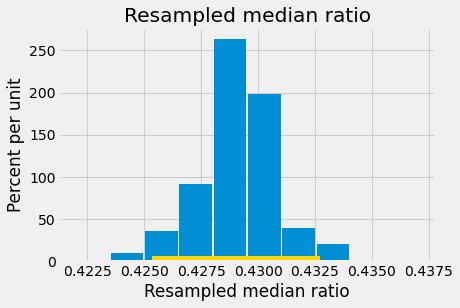

In [12]:
pd.DataFrame({'Resampled median ratio': medians}).hist(density=True, rwidth=0.95)
plt.plot(interval_95, [1, 1], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Resampled median ratio')
print('95% Confidence Interval for Median Weight/Days ratio')
print(interval_95)

80% confidence interval:

In [13]:
interval_80 = np.array([percentile(medians,10), percentile(medians,90)])
interval_80

array([0.42704626, 0.43081761])

80% Confidence interval for median weight/days ratio in population:
[0.427 0.431]


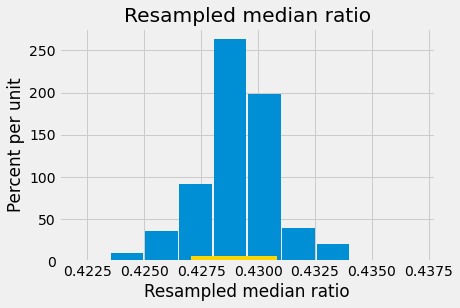

In [14]:
pd.DataFrame({'Resampled median ratio': medians}).hist(density=True, rwidth=0.95)
plt.plot(interval_80, [1, 1], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Resampled median ratio')
print('80% Confidence interval for median weight/days ratio in population:')
print(np.round(interval_80, 3))

## Confidence Interval for a Population Mean: Bootstrap Percentile Method ##

In [8]:
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


Suppose we want to estimate the average age of the mothers in the population. A natural estimate is the average age of the mothers in the sample. Here is the distribution of their ages, and their average age which was about 27.2 years:

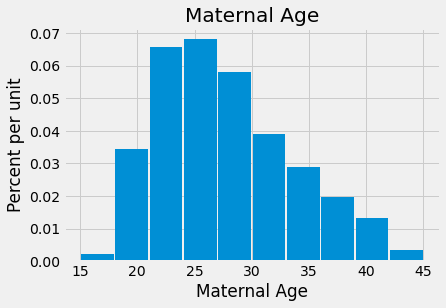

In [9]:
births.hist('Maternal Age', density=True, rwidth=0.95)
plt.ylabel('Percent per unit')
plt.xlabel('Maternal Age')
plt.show()

In [17]:
np.mean(births['Maternal Age'])

27.228279386712096

What was the average age of the mothers in the population? We don’t know the value of this parameter.

Let’s estimate an interval for the unknown parameter by the bootstrap method:


In [10]:
# Bootstrap for mean

means = np.array([])

for i in np.arange(5000):
    resampled = births.sample(len(births),replace=True)
    mean = np.mean(resampled['Maternal Age'])
    means = np.append(means, mean)

The 95% confidence interval:

In [11]:
interval_95 = np.array([percentile(means,2.5), percentile(means, 97.5)])
interval_95

array([26.90204429, 27.56984668])

95% Confidence Interval for Mean Age
[26.90204429 27.56984668]


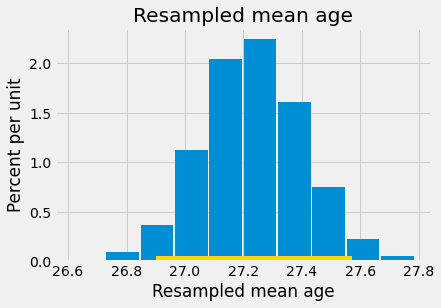

In [13]:
pd.DataFrame({'Resampled mean age': means}).hist(density=True, rwidth=0.95)
plt.plot(interval_95, [0.01, 0.01], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Resampled mean age')
print('95% Confidence Interval for Mean Age')
print(interval_95)

80% confidence interval:

In [12]:
interval_80 = np.array([percentile(means, 10), percentile(means, 90)])
interval_80

array([27.01448041, 27.45144804])

80% Confidence Interval for Mean Age
[27.01448041 27.45144804]


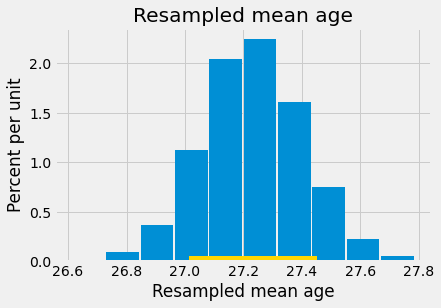

In [14]:
pd.DataFrame({'Resampled mean age': means}).hist(density=True, rwidth=0.95)
plt.plot(interval_80, [0.01, 0.01], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Resampled mean age')
print('80% Confidence Interval for Mean Age')
print(interval_80)

## Confidence Interval for a Population Proportion: Bootstrap Percentile Method ##

What percent of mothers in the population smoked during pregnancy? This is an unknown parameter which we can estimate by a bootstrap confidence interval. The steps in the process are analogous to those we took to estimate the population mean and median.

In the sample, 39% of the mothers smoked during pregnancy:

In [23]:
smoking = births['Maternal Smoker']
np.count_nonzero(smoking)/len(smoking)

0.3909710391822828

In [24]:
np.average(smoking)

0.3909710391822828

In [25]:
# Bootstrap for Proportion

proportions = np.array([])

for i in np.arange(5000):
    resampled = births.sample(len(births), replace=True)
    smoking = resampled['Maternal Smoker']
    proportion=np.count_nonzero(smoking)/len(smoking)
    proportions = np.append(proportions, proportion)

The 95% confidence interval:

In [26]:
interval_95 = np.array([percentile(proportions,2.5), percentile(proportions, 97.5)])
interval_95

array([0.36286201, 0.41908007])

95% Confidence Interval for Smoker Proportion
[0.36286201 0.41908007]


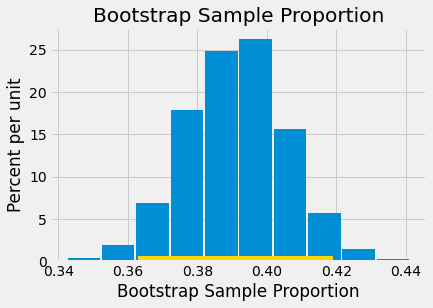

In [27]:
pd.DataFrame({'Bootstrap Sample Proportion': proportions}).hist(density=True, rwidth=0.95)
plt.plot(interval_95, [0.1, 0.1], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Bootstrap Sample Proportion')
print('95% Confidence Interval for Smoker Proportion')
print(interval_95)

The 80% confidence interval:

In [28]:
interval_80 = np.array([percentile(proportions,10), percentile(proportions,90)])
interval_80

array([0.37308348, 0.40971039])

80% Confidence Interval for Smoker Proportion
[0.37308348 0.40971039]


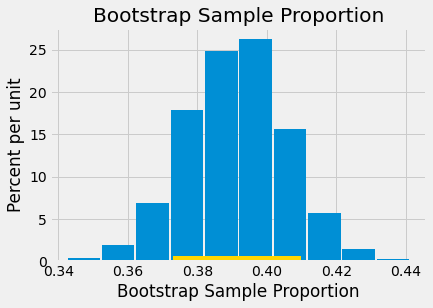

In [29]:
pd.DataFrame({'Bootstrap Sample Proportion': proportions}).hist(density=True, rwidth=0.95)
plt.plot(interval_80, [0.1, 0.1], color='gold', lw=8)
plt.ylabel('Percent per unit')
plt.xlabel('Bootstrap Sample Proportion')
print('80% Confidence Interval for Smoker Proportion')
print(interval_80)